In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mirella Glowinska C00275764

Dataset Source:https://www.kaggle.com/datasets/uciml/iris/data

------------------------------------------------------------------------------
First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
------------------------------------------------------------------------------
Shape of dataset: (150, 6)
------------------------------------------------------------------------------
Minimum values:
Id               1.0
SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64
------------------------------------------------------------------------------

Maximum values:
Id           

<ipython-input-5-0257c8f3b75e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=iris_df, palette='magma')


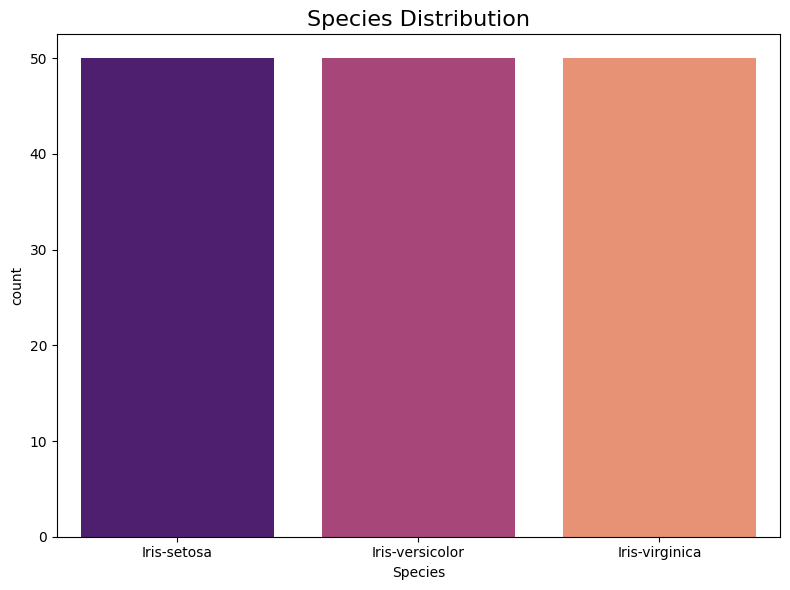

<ipython-input-5-0257c8f3b75e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='SepalLengthCm', data=iris_df, palette='crest', estimator='mean')


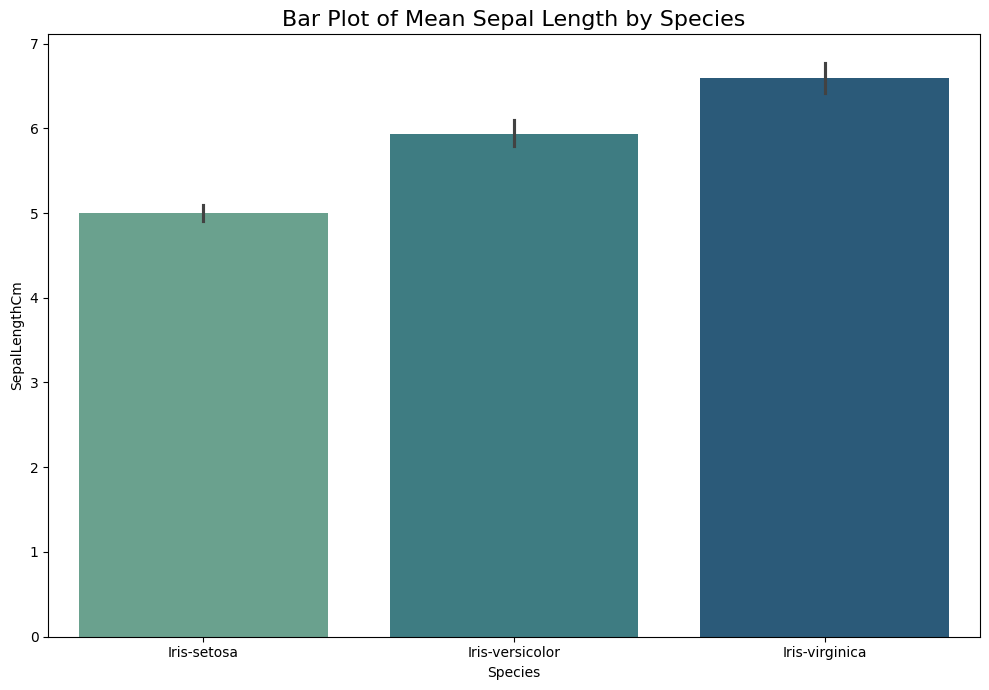


Kernel: linear
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Kernel: rbf
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Kernel: poly
Accuracy: 1.0
Classification Report:
                  precision    recall  f

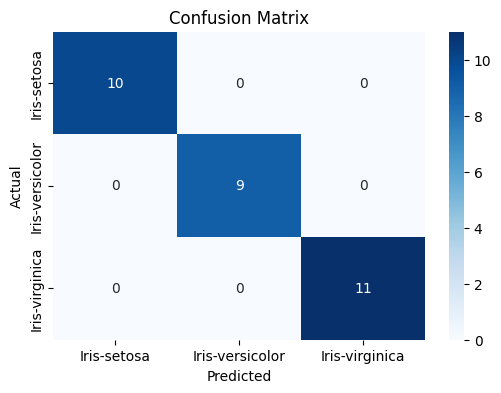

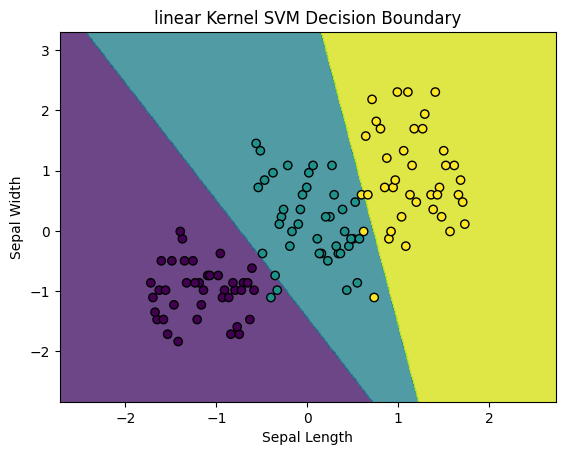

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris_df = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')

print("------------------------------------------------------------------------------")
print("First 5 rows of the dataset:")
print(iris_df.head())
print("------------------------------------------------------------------------------")
print(f"Shape of dataset: {iris_df.shape}")
print("------------------------------------------------------------------------------")

print("Minimum values:")
print(iris_df.min(numeric_only=True))
print("------------------------------------------------------------------------------")
print("\nMaximum values:")
print(iris_df.max(numeric_only=True))
print("------------------------------------------------------------------------------")

print(iris_df.describe())
print("------------------------------------------------------------------------------")
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=iris_df, palette='magma')
plt.title("Species Distribution", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
sns.barplot(x='Species', y='SepalLengthCm', data=iris_df, palette='crest', estimator='mean')
plt.title("Bar Plot of Mean Sepal Length by Species", fontsize=16)
plt.tight_layout()
plt.show()

X = iris_df.iloc[:, :-1].values
# y- Species
y = iris_df.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kernel Features
kernels = ['linear', 'rbf', 'poly']
best_model = None
best_accuracy = 0

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Based on accuracy select the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize Decision Boundary
def plot_decision_boundary(X, y, model):
    # Meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Meshgrid Prediction
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(f'{model.kernel} Kernel SVM Decision Boundary')
    plt.show()

X_2d = X_train[:, :2]

best_model_2d = SVC(kernel=best_model.kernel)
best_model_2d.fit(X_2d, y_train)
plot_decision_boundary(X_2d, y_train, best_model_2d)

In [ ]:
import joblib

joblib.dump(best_model, 'iris_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

loaded_model = joblib.load('iris_model.pkl')

new_data = X_test[0].reshape(1, -1)
new_prediction = loaded_model.predict(new_data)

predicted_species = label_encoder.inverse_transform(new_prediction)
print(f"Predicted Species: {predicted_species[0]}")

from google.colab import files
files.download('iris_model.pkl')
files.download('label_encoder.pkl')

Predicted Species: Iris-versicolor


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>